# BAGGING

In [2]:
# (sample with replacement) of original dataset to make many different samples for training models

In [30]:
# import models and utility functions
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_pd.columns = data.feature_names
print(data_pd.head())
# assign predictors and dependent to x and y and make dataframe
X =data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [10]:
SEED = 1
# Split data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [12]:
# instantiate a classification tree dt
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = SEED)

# Instantiate Bagging Classifier bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)


# fit bc to the training set
bc.fit(X_train, y_train)


# predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Baggign Classifier: {:.3f}'.format(accuracy))

Accuracy of Baggign Classifier: 0.942


# Out of Bag Evaluation

In [13]:
SEED = 1
# Split data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [14]:
# instantiate a classification tree dt
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = SEED)


In [17]:
# Instantiate Bagging Classifier bc
# just change oob_score = True as a parameter
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,oob_score =True, n_jobs=-1)

In [18]:
# fit bc to the train set
bc.fit(X_train,y_train)

# predict the test set labels
y_pred = bc.predict(X_test)

In [19]:
# evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# extract the OOB accracy from bc
oob_accuracy = bc.oob_score_

# print the test set accuracy 
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.936


In [20]:
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.925


#  RANDOM FORESTS

In [21]:
# USES RANDOM SAMPLES SAME SIZE AS TRAINING SET
# EACH TREE TRAINED ON DIFFERENT SAMPLE (WITHOUT REPLACEMENT)

In [22]:
df = pd.read_csv("cars.csv")
df.head(5)

In [35]:
y = df[["mpg"]]
X = df[["cylinders", "displacement","weight","acceleration","model year"]]

In [36]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


In [37]:
# make random forest regressor
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state = SEED)

In [38]:
# fit rf to the training set
rf.fit(X_train, y_train)

# predict the test set labels y_pred
y_pred = rf.predict(X_test)

C:\Users\blake\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [39]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# print the test rmse
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.19


# Visualize importance of features

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt

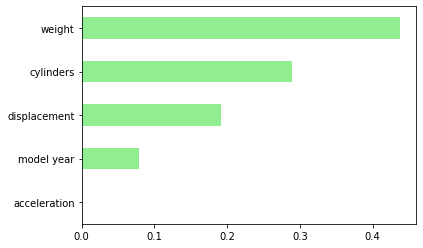

In [41]:
# create a pd.series of features importance
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# make horizontal bar plot
sorted_importances_rf.plot(kind = 'barh', color = 'lightgreen'); plt.show()